In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline

In [13]:
data = pd.read_csv('../data/Iris.csv')
data = df.rename(index=str, columns={"Species": "Class"})

In [14]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Class            150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 8.2+ KB


In [16]:
target_names_iris = ['setosa', 'versicolor', 'virginica']

X = data.drop(['SepalWidthCm','PetalWidthCm','Class','Id'],axis=1).values
y = data['Class'].values

from sklearn.preprocessing import LabelEncoder
labelencoder_previsores = LabelEncoder()
y = labelencoder_previsores.fit_transform(y)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)
X = pd.DataFrame(scaled_features,columns=df.columns[1:3]).values

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [19]:
from sklearn.neural_network import MLPClassifier

In [20]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001, activation='identity',
                     solver='sgd', verbose=10,  random_state=0,tol=0.000000001)

In [21]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Iteration 1, loss = 1.47259835
Iteration 2, loss = 1.45394536
Iteration 3, loss = 1.42787577
Iteration 4, loss = 1.39566475
Iteration 5, loss = 1.35854645
Iteration 6, loss = 1.31769006
Iteration 7, loss = 1.27418234
Iteration 8, loss = 1.22901531
Iteration 9, loss = 1.18307793
Iteration 10, loss = 1.13715111
Iteration 11, loss = 1.09190530
Iteration 12, loss = 1.04790051
Iteration 13, loss = 1.00558848
Iteration 14, loss = 0.96531696
Iteration 15, loss = 0.92733612
Iteration 16, loss = 0.89180676
Iteration 17, loss = 0.85881014
Iteration 18, loss = 0.82835902
Iteration 19, loss = 0.80040922
Iteration 20, loss = 0.77487134
Iteration 21, loss = 0.75162199
Iteration 22, loss = 0.73051402
Iteration 23, loss = 0.71138563
Iteration 24, loss = 0.69406798
Iteration 25, loss = 0.67839145
Iteration 26, loss = 0.66419041
Iteration 27, loss = 0.65130671
Iteration 28, loss = 0.63959219
Iteration 29, loss = 0.62891007
Iteration 30, loss = 0.61913579
Iteration 31, loss = 0.61015715
Iteration 32, los

Iteration 331, loss = 0.24001386
Iteration 332, loss = 0.23954724
Iteration 333, loss = 0.23908185
Iteration 334, loss = 0.23861768
Iteration 335, loss = 0.23815472
Iteration 336, loss = 0.23769299
Iteration 337, loss = 0.23723246
Iteration 338, loss = 0.23677316
Iteration 339, loss = 0.23631506
Iteration 340, loss = 0.23585818
Iteration 341, loss = 0.23540251
Iteration 342, loss = 0.23494804
Iteration 343, loss = 0.23449478
Iteration 344, loss = 0.23404273
Iteration 345, loss = 0.23359188
Iteration 346, loss = 0.23314224
Iteration 347, loss = 0.23269380
Iteration 348, loss = 0.23224655
Iteration 349, loss = 0.23180051
Iteration 350, loss = 0.23135567
Iteration 351, loss = 0.23091202
Iteration 352, loss = 0.23046957
Iteration 353, loss = 0.23002832
Iteration 354, loss = 0.22958825
Iteration 355, loss = 0.22914939
Iteration 356, loss = 0.22871171
Iteration 357, loss = 0.22827523
Iteration 358, loss = 0.22783993
Iteration 359, loss = 0.22740583
Iteration 360, loss = 0.22697291
Iteration 

C:\Users\Murilo\Anaconda3\envs\py37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [22]:
## Cross Validation

from sklearn.model_selection import cross_val_score
scores_dt = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
print(scores_dt.mean())

Iteration 1, loss = 1.42454703
Iteration 2, loss = 1.40922918
Iteration 3, loss = 1.38778403
Iteration 4, loss = 1.36122525
Iteration 5, loss = 1.33052932
Iteration 6, loss = 1.29661791
Iteration 7, loss = 1.26034537
Iteration 8, loss = 1.22249030
Iteration 9, loss = 1.18375042
Iteration 10, loss = 1.14474005
Iteration 11, loss = 1.10598979
Iteration 12, loss = 1.06794779
Iteration 13, loss = 1.03098255
Iteration 14, loss = 0.99538688
Iteration 15, loss = 0.96138288
Iteration 16, loss = 0.92912789
Iteration 17, loss = 0.89872106
Iteration 18, loss = 0.87021057
Iteration 19, loss = 0.84360097
Iteration 20, loss = 0.81886078
Iteration 21, loss = 0.79592968
Iteration 22, loss = 0.77472543
Iteration 23, loss = 0.75515006
Iteration 24, loss = 0.73709548
Iteration 25, loss = 0.72044811
Iteration 26, loss = 0.70509283
Iteration 27, loss = 0.69091604
Iteration 28, loss = 0.67780806
Iteration 29, loss = 0.66566483
Iteration 30, loss = 0.65438905
Iteration 31, loss = 0.64389091
Iteration 32, los

Iteration 289, loss = 0.24845207
Iteration 290, loss = 0.24799083
Iteration 291, loss = 0.24753106
Iteration 292, loss = 0.24707275
Iteration 293, loss = 0.24661589
Iteration 294, loss = 0.24616048
Iteration 295, loss = 0.24570650
Iteration 296, loss = 0.24525395
Iteration 297, loss = 0.24480281
Iteration 298, loss = 0.24435308
Iteration 299, loss = 0.24390474
Iteration 300, loss = 0.24345779
Iteration 301, loss = 0.24301222
Iteration 302, loss = 0.24256802
Iteration 303, loss = 0.24212518
Iteration 304, loss = 0.24168370
Iteration 305, loss = 0.24124356
Iteration 306, loss = 0.24080476
Iteration 307, loss = 0.24036729
Iteration 308, loss = 0.23993113
Iteration 309, loss = 0.23949630
Iteration 310, loss = 0.23906277
Iteration 311, loss = 0.23863054
Iteration 312, loss = 0.23819960
Iteration 313, loss = 0.23776994
Iteration 314, loss = 0.23734156
Iteration 315, loss = 0.23691445
Iteration 316, loss = 0.23648861
Iteration 317, loss = 0.23606402
Iteration 318, loss = 0.23564068
Iteration 

C:\Users\Murilo\Anaconda3\envs\py37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 34, loss = 0.61218143
Iteration 35, loss = 0.60494676
Iteration 36, loss = 0.59812406
Iteration 37, loss = 0.59166624
Iteration 38, loss = 0.58553263
Iteration 39, loss = 0.57968827
Iteration 40, loss = 0.57410325
Iteration 41, loss = 0.56875203
Iteration 42, loss = 0.56361291
Iteration 43, loss = 0.55866740
Iteration 44, loss = 0.55389984
Iteration 45, loss = 0.54929688
Iteration 46, loss = 0.54484712
Iteration 47, loss = 0.54054080
Iteration 48, loss = 0.53636950
Iteration 49, loss = 0.53232586
Iteration 50, loss = 0.52840341
Iteration 51, loss = 0.52459639
Iteration 52, loss = 0.52089959
Iteration 53, loss = 0.51730823
Iteration 54, loss = 0.51381790
Iteration 55, loss = 0.51042445
Iteration 56, loss = 0.50712394
Iteration 57, loss = 0.50391263
Iteration 58, loss = 0.50078689
Iteration 59, loss = 0.49774325
Iteration 60, loss = 0.49477833
Iteration 61, loss = 0.49188886
Iteration 62, loss = 0.48907168
Iteration 63, loss = 0.48632371
Iteration 64, loss = 0.48364200
Iteratio

Iteration 304, loss = 0.25376720
Iteration 305, loss = 0.25324822
Iteration 306, loss = 0.25273068
Iteration 307, loss = 0.25221459
Iteration 308, loss = 0.25169993
Iteration 309, loss = 0.25118670
Iteration 310, loss = 0.25067490
Iteration 311, loss = 0.25016453
Iteration 312, loss = 0.24965558
Iteration 313, loss = 0.24914805
Iteration 314, loss = 0.24864193
Iteration 315, loss = 0.24813723
Iteration 316, loss = 0.24763395
Iteration 317, loss = 0.24713206
Iteration 318, loss = 0.24663159
Iteration 319, loss = 0.24613252
Iteration 320, loss = 0.24563484
Iteration 321, loss = 0.24513856
Iteration 322, loss = 0.24464368
Iteration 323, loss = 0.24415019
Iteration 324, loss = 0.24365809
Iteration 325, loss = 0.24316738
Iteration 326, loss = 0.24267805
Iteration 327, loss = 0.24219011
Iteration 328, loss = 0.24170355
Iteration 329, loss = 0.24121836
Iteration 330, loss = 0.24073455
Iteration 331, loss = 0.24025212
Iteration 332, loss = 0.23977106
Iteration 333, loss = 0.23929137
Iteration 

C:\Users\Murilo\Anaconda3\envs\py37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 23, loss = 0.74752007
Iteration 24, loss = 0.72997459
Iteration 25, loss = 0.71386797
Iteration 26, loss = 0.69907264
Iteration 27, loss = 0.68546430
Iteration 28, loss = 0.67292423
Iteration 29, loss = 0.66134094
Iteration 30, loss = 0.65061119
Iteration 31, loss = 0.64064057
Iteration 32, loss = 0.63134362
Iteration 33, loss = 0.62264370
Iteration 34, loss = 0.61447266
Iteration 35, loss = 0.60677032
Iteration 36, loss = 0.59948393
Iteration 37, loss = 0.59256748
Iteration 38, loss = 0.58598106
Iteration 39, loss = 0.57969023
Iteration 40, loss = 0.57366539
Iteration 41, loss = 0.56788115
Iteration 42, loss = 0.56231583
Iteration 43, loss = 0.55695091
Iteration 44, loss = 0.55177061
Iteration 45, loss = 0.54676144
Iteration 46, loss = 0.54191187
Iteration 47, loss = 0.53721199
Iteration 48, loss = 0.53265324
Iteration 49, loss = 0.52822817
Iteration 50, loss = 0.52393023
Iteration 51, loss = 0.51975360
Iteration 52, loss = 0.51569306
Iteration 53, loss = 0.51174384
Iteratio

Iteration 291, loss = 0.23322004
Iteration 292, loss = 0.23265329
Iteration 293, loss = 0.23208813
Iteration 294, loss = 0.23152456
Iteration 295, loss = 0.23096257
Iteration 296, loss = 0.23040216
Iteration 297, loss = 0.22984332
Iteration 298, loss = 0.22928604
Iteration 299, loss = 0.22873033
Iteration 300, loss = 0.22817617
Iteration 301, loss = 0.22762356
Iteration 302, loss = 0.22707250
Iteration 303, loss = 0.22652299
Iteration 304, loss = 0.22597501
Iteration 305, loss = 0.22542856
Iteration 306, loss = 0.22488364
Iteration 307, loss = 0.22434025
Iteration 308, loss = 0.22379838
Iteration 309, loss = 0.22325803
Iteration 310, loss = 0.22271919
Iteration 311, loss = 0.22218186
Iteration 312, loss = 0.22164603
Iteration 313, loss = 0.22111171
Iteration 314, loss = 0.22057889
Iteration 315, loss = 0.22004756
Iteration 316, loss = 0.21951772
Iteration 317, loss = 0.21898938
Iteration 318, loss = 0.21846252
Iteration 319, loss = 0.21793714
Iteration 320, loss = 0.21741324
Iteration 

C:\Users\Murilo\Anaconda3\envs\py37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 38, loss = 0.59767375
Iteration 39, loss = 0.59171554
Iteration 40, loss = 0.58602313
Iteration 41, loss = 0.58057062
Iteration 42, loss = 0.57533580
Iteration 43, loss = 0.57029967
Iteration 44, loss = 0.56544601
Iteration 45, loss = 0.56076092
Iteration 46, loss = 0.55623249
Iteration 47, loss = 0.55185047
Iteration 48, loss = 0.54760597
Iteration 49, loss = 0.54349123
Iteration 50, loss = 0.53949944
Iteration 51, loss = 0.53562451
Iteration 52, loss = 0.53186098
Iteration 53, loss = 0.52820387
Iteration 54, loss = 0.52464857
Iteration 55, loss = 0.52119080
Iteration 56, loss = 0.51782653
Iteration 57, loss = 0.51455192
Iteration 58, loss = 0.51136332
Iteration 59, loss = 0.50825720
Iteration 60, loss = 0.50523018
Iteration 61, loss = 0.50227896
Iteration 62, loss = 0.49940038
Iteration 63, loss = 0.49659137
Iteration 64, loss = 0.49384898
Iteration 65, loss = 0.49117034
Iteration 66, loss = 0.48855271
Iteration 67, loss = 0.48599344
Iteration 68, loss = 0.48349001
Iteratio

Iteration 295, loss = 0.25183545
Iteration 296, loss = 0.25122511
Iteration 297, loss = 0.25061641
Iteration 298, loss = 0.25000934
Iteration 299, loss = 0.24940391
Iteration 300, loss = 0.24880011
Iteration 301, loss = 0.24819794
Iteration 302, loss = 0.24759740
Iteration 303, loss = 0.24699848
Iteration 304, loss = 0.24640119
Iteration 305, loss = 0.24580552
Iteration 306, loss = 0.24521147
Iteration 307, loss = 0.24461904
Iteration 308, loss = 0.24402823
Iteration 309, loss = 0.24343904
Iteration 310, loss = 0.24285147
Iteration 311, loss = 0.24226550
Iteration 312, loss = 0.24168116
Iteration 313, loss = 0.24109842
Iteration 314, loss = 0.24051730
Iteration 315, loss = 0.23993778
Iteration 316, loss = 0.23935988
Iteration 317, loss = 0.23878358
Iteration 318, loss = 0.23820890
Iteration 319, loss = 0.23763582
Iteration 320, loss = 0.23706434
Iteration 321, loss = 0.23649447
Iteration 322, loss = 0.23592621
Iteration 323, loss = 0.23535955
Iteration 324, loss = 0.23479449
Iteration 

C:\Users\Murilo\Anaconda3\envs\py37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 22, loss = 0.76275756
Iteration 23, loss = 0.74390787
Iteration 24, loss = 0.72664549
Iteration 25, loss = 0.71083770
Iteration 26, loss = 0.69635262
Iteration 27, loss = 0.68306231
Iteration 28, loss = 0.67084509
Iteration 29, loss = 0.65958710
Iteration 30, loss = 0.64918325
Iteration 31, loss = 0.63953776
Iteration 32, loss = 0.63056420
Iteration 33, loss = 0.62218534
Iteration 34, loss = 0.61433269
Iteration 35, loss = 0.60694601
Iteration 36, loss = 0.59997262
Iteration 37, loss = 0.59336674
Iteration 38, loss = 0.58708880
Iteration 39, loss = 0.58110471
Iteration 40, loss = 0.57538525
Iteration 41, loss = 0.56990540
Iteration 42, loss = 0.56464378
Iteration 43, loss = 0.55958216
Iteration 44, loss = 0.55470492
Iteration 45, loss = 0.54999868
Iteration 46, loss = 0.54545192
Iteration 47, loss = 0.54105467
Iteration 48, loss = 0.53679820
Iteration 49, loss = 0.53267481
Iteration 50, loss = 0.52867764
Iteration 51, loss = 0.52480051
Iteration 52, loss = 0.52103776
Iteratio

Iteration 310, loss = 0.23754988
Iteration 311, loss = 0.23700622
Iteration 312, loss = 0.23646431
Iteration 313, loss = 0.23592413
Iteration 314, loss = 0.23538568
Iteration 315, loss = 0.23484897
Iteration 316, loss = 0.23431398
Iteration 317, loss = 0.23378073
Iteration 318, loss = 0.23324919
Iteration 319, loss = 0.23271938
Iteration 320, loss = 0.23219129
Iteration 321, loss = 0.23166492
Iteration 322, loss = 0.23114027
Iteration 323, loss = 0.23061733
Iteration 324, loss = 0.23009610
Iteration 325, loss = 0.22957658
Iteration 326, loss = 0.22905877
Iteration 327, loss = 0.22854267
Iteration 328, loss = 0.22802827
Iteration 329, loss = 0.22751557
Iteration 330, loss = 0.22700457
Iteration 331, loss = 0.22649527
Iteration 332, loss = 0.22598767
Iteration 333, loss = 0.22548176
Iteration 334, loss = 0.22497755
Iteration 335, loss = 0.22447502
Iteration 336, loss = 0.22397418
Iteration 337, loss = 0.22347503
Iteration 338, loss = 0.22297757
Iteration 339, loss = 0.22248178
Iteration 

C:\Users\Murilo\Anaconda3\envs\py37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [24]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics 

print(classification_report(y_test,y_pred))
print(" Neural Network model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.95      0.97        20
           2       0.92      1.00      0.96        12

   micro avg       0.98      0.98      0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

 Neural Network model accuracy(in %): 97.77777777777777
[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]


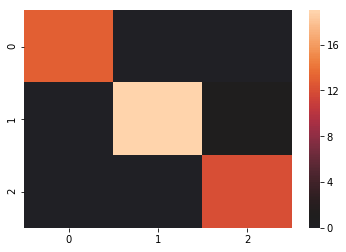

In [25]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, center=True)
plt.show()

In [ ]:
#Decision regions in 2D
from mlxtend.plotting import plot_decision_regions

#Plotting decision regions
plot_decision_regions(X, y, clf=classifier_dt, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Decision Tree classifier on Iris')
plt.legend(target_names_iris)
plt.show()